# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Boston Housing data set.

## Objectives

You will be able to:
- Understand what interactions are
- Understand how to accommodate for interactions in regression

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the Boston data set using `load_boston()`. We won't bother to preprocess the data in this lab. If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
regression = LinearRegression()
boston = load_boston()

Create a baseline model which includes all the variables in the Boston housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [6]:
## code here
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [15]:
boston_df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92442fb978>,
      dtype=object)

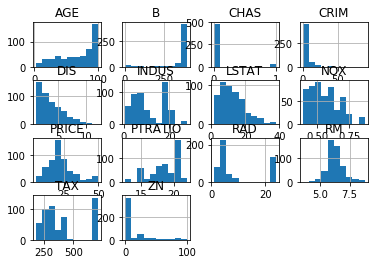

In [13]:
# Normalise data
boston_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f920e4c4240>,
      dtype=object)

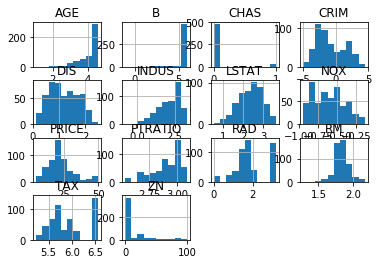

In [25]:
# Log transform less normal distribution
less_normal_cols = ['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX']

log_boston_df = boston_df.copy()
for col in less_normal_cols:
    log_boston_df[col] = np.log(boston_df[col])

log_boston_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f920ded4240>,
      dtype=object)

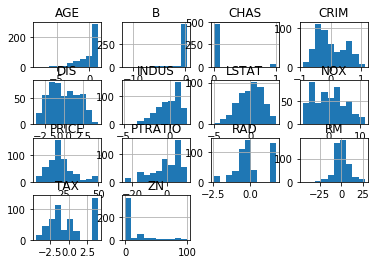

In [26]:
# scale predictors
scaled_cols = ['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX']

scaled_boston_df = log_boston_df.copy()
# using the standardisation for all predictors
for col in scaled_cols:
    scaled_boston_df[col] = (log_boston_df[col] - log_boston_df[col].mean()) / log_boston_df[col].var()

scaled_boston_df.hist()

In [27]:
y = scaled_boston_df['PRICE']
X = scaled_boston_df.drop(columns=['PRICE'], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.916384,18.0,-2.191359,0.0,-0.243156,4.074731,0.232321,0.757488,-2.440324,-1.534280,-11.556922,0.390827,-2.120183
1,-0.603292,0.0,-0.338460,0.0,-3.624226,2.196244,0.743634,1.424902,-1.534644,-2.816351,-1.843039,0.390827,-0.438432
2,-0.603449,0.0,-0.338460,0.0,-3.624226,11.106640,0.058200,1.424902,-1.534644,-2.816351,-1.843039,0.373598,-2.706394
3,-0.566929,0.0,-2.287304,0.0,-4.208864,9.016498,-0.714520,2.109304,-1.004855,-3.365408,1.322813,0.381239,-3.579788
4,-0.404857,0.0,-2.287304,0.0,-4.208864,10.686344,-0.263059,2.109304,-1.004855,-3.365408,1.322813,0.390827,-1.932072


In [28]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))
baseline

0.7706251992644717

In [50]:
# Try with no prior standardisation
y = boston_df['PRICE']
X = boston_df.drop(columns=['PRICE'], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [51]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))
baseline

0.7190106820189482

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a for loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

In [29]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))
combinations

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NOX', 'PTRATIO'),
 ('NOX', 'B'),
 ('NOX', 'LSTAT'),
 ('RM', 'AGE'),
 ('RM', 'DIS'),
 ('RM', 'RAD'),
 ('RM', 'TAX'),
 ('RM', 'PTRATIO'),
 ('RM', 'B'),
 

In [32]:
combinations[10]

('CRIM', 'B')

In [54]:
## code to find top 3 interactions by R^2 value here
baselines = []
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Build comb-baseline array
data = X.copy()
for comb in combinations:
    data["interaction"] = data[comb[0]] * data[comb[1]]

    baseline_comb = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
    baselines.append({'comb': comb, 'baseline': baseline_comb})

baselines[0]

{'comb': ('CRIM', 'ZN'), 'baseline': 0.7180486571803364}

In [55]:
# Filter top 3 combs
sorted_baselines = sorted(baselines, key=lambda x: x['baseline'], reverse=True)

top_3_combs = sorted_baselines[0:3]
top_3_combs

[{'comb': ('RM', 'LSTAT'), 'baseline': 0.7864889421124032},
 {'comb': ('RM', 'TAX'), 'baseline': 0.7750525123747651},
 {'comb': ('RM', 'RAD'), 'baseline': 0.7682152400234054}]

## Look at the top 3 interactions: "RM" as a confounding factor

The top three interactions seem to involve "RM", the number of rooms as a confounding variable for all of them. Let's have a look at interaction plots for all three of them. This exercise will involve:

- splitting the data up in 3 groups: one for houses with a few rooms, one for houses with a "medium" amount of rooms, one for a high amount of rooms.
- Create a function `build_interaction_rm`. This function takes an argument `varname` (which can be set equal to the column name as a string) and a column `description` (which describes the variable or varname, to be included on the x-axis of the plot). The function outputs a plot that uses "RM" as a confounding factor. Each plot should have three regression lines, one for each level of "RM." 

The data has been split into high, medium and low number of rooms for you.

In [57]:
rm = np.asarray(boston_df[["RM"]]).reshape(len(boston_df[["RM"]]))

In [64]:
a = np.arange(6).reshape((2,3))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [58]:
rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [65]:
high_rm = all_data[rm > np.percentile(rm, 67)]
med_rm = all_data[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = all_data[rm <= np.percentile(rm, 33)]

NameError: name 'all_data' is not defined

In [69]:
boston_df.RM.quantile(.66),boston_df.RM.quantile(.33) 

(6.4346000000000005, 5.983)

In [76]:
high_rm = boston_df[boston_df['RM'] > boston_df.RM.quantile(.66)]
med_rm = boston_df[(boston_df['RM'] <= boston_df.RM.quantile(.66)) & (boston_df['RM'] > boston_df.RM.quantile(.33))]
low_rm = boston_df[boston_df['RM'] <= boston_df.RM.quantile(.33)]
low_rm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1


Create `build_interaction_rm`.

In [89]:
def build_interaction_rm(varname, description):
    
    regression_1 = LinearRegression()
    regression_2 = LinearRegression()
    regression_3 = LinearRegression()

    var_1 = high_rm[varname].values.reshape(-1, 1)
    var_2 = med_rm[varname].values.reshape(-1, 1)
    var_3 = low_rm[varname].values.reshape(-1, 1)

    regression_1.fit(var_1, high_rm["PRICE"])
    regression_2.fit(var_2, med_rm["PRICE"])
    regression_3.fit(var_3, low_rm["PRICE"])

    # Make predictions using the testing set
    pred_1 = regression_1.predict(var_1)
    pred_2 = regression_2.predict(var_2)
    pred_3 = regression_3.predict(var_3)
    plt.figure(figsize=(10,6))

    plt.scatter(var_1, high_rm["PRICE"],  color='blue', alpha = 0.3, label = "high RM")
    plt.scatter(var_2, med_rm["PRICE"],  color='red', alpha = 0.3, label = "med RM")
    plt.scatter(var_3, low_rm["PRICE"],  color='orange', alpha = 0.3, label = "low RM")

    plt.plot(var_1, pred_1,  color='blue', linewidth=2)
    plt.plot(var_2, pred_2,  color='red', linewidth=2)
    plt.plot(var_3, pred_3,  color='orange', linewidth=2)
    plt.ylabel("PRICE")
    plt.xlabel(description)
    plt.legend();

Next, use build_interaction_rm with the three variables that came out with the highest effect on $R^2$

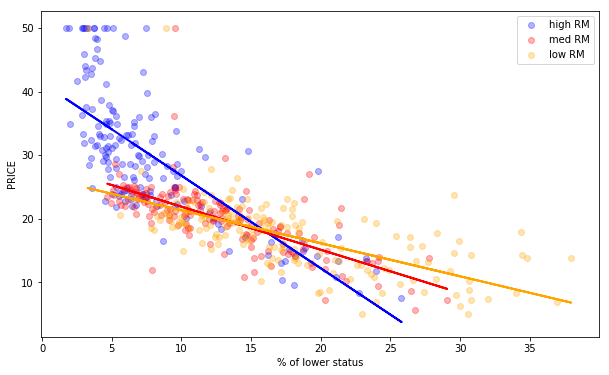

In [91]:
# first plot
build_interaction_rm('LSTAT', '% of lower status')

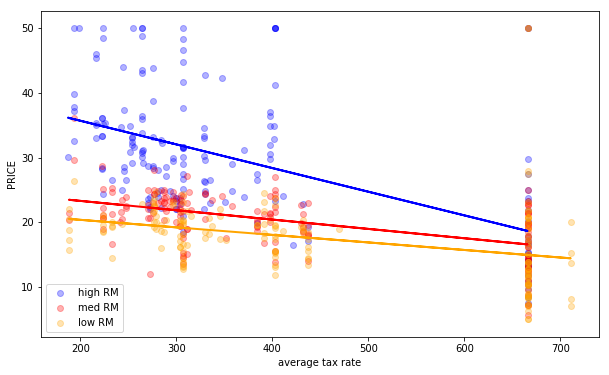

In [93]:
# second plot
build_interaction_rm("TAX","average tax rate")

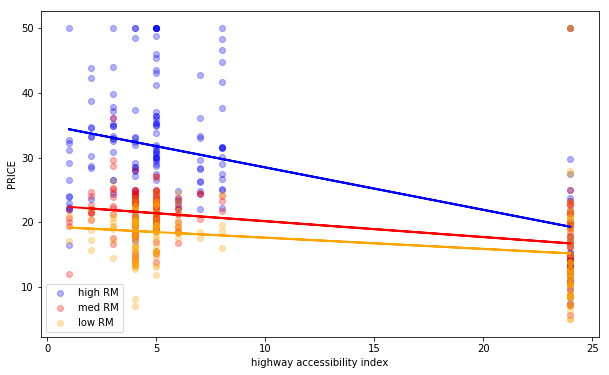

In [94]:
# third plot
build_interaction_rm("RAD","highway accessibility index")

## Build a final model including all three interactions at once

Use 10-fold cross validation.

In [95]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [96]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [97]:
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact["LSTAT_RM"] = X["LSTAT"] * X["RM"]
X_interact["RAD_RM"] = X["RAD"] * X["RM"]
X_interact["TAX_RM"] = X["TAX"] * X["RM"]

interact_all_rm = np.mean(cross_val_score(regression, X_interact, y, scoring="r2", cv=crossvalidation))
interact_all_rm



0.7852890964511965

In [ ]:
# code here

Our $R^2$ has increased considerably! Let's have a look in statsmodels to see if all these interactions are significant.

In [98]:
# code here
import statsmodels.api as sm
X_interact = sm.add_constant(X_interact)
model = sm.OLS(y,X_interact)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     134.3
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          3.25e-167
Time:                        17:01:47   Log-Likelihood:                -1413.9
No. Observations:                 506   AIC:                             2862.
Df Residuals:                     489   BIC:                             2934.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.8453      7.428     -1.998      0.046     -29.441      -0.250
CRIM          -0.1628      0.028     -5.756      0.000      -0.218      -0.107
ZN             0.0174      0.012      1.463      0.144      -0.006       0.041
INDUS          0.0900      0.053      1.707      0.088      -0.014       0.194
CHAS           2.5988      0.740      3.511      0.000       1.144       4.053
NOX          -13.4647      3.277     -4.109      0.000     -19.903      -7.026
RM            10.8250      0.986     10.976      0.000       8.887      12.763
AGE            0.0052      0.011      0.461      0.645      -0.017       0.028
DIS           -0.9547      0.175     -5.469      0.000      -1.298      -0.612
RAD            0.7093      0.476      1.489      0.137      -0.227       1.645
TAX            0.0333      0.025      1.354      0.176      -0.015       0.082
PTRATIO       -0.6849      0.113     -6.068      0.000      -0.907      -0.463
B              0.0048      0.002      2.068      0.039       0.000       0.009
LSTAT          1.1528      0.232      4.973      0.000       0.697       1.608
LSTAT_RM      -0.2916      0.041     -7.169      0.000      -0.372      -0.212
RAD_RM        -0.0699      0.078     -0.896      0.371      -0.223       0.083
TAX_RM        -0.0072      0.004     -1.828      0.068      -0.015       0.001
==============================================================================
Omnibus:                      255.231   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2564.486
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      13.307   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your conclusion here?

# formulate your conclusion
Even though each individual interaction had a considerable effect\non the $R^2$, but adding all three of them in our final model led to\ninsignificant results for some of them. It might be worth checking \nhow the $R^2$ changes again when just including 2 interactions in \nthe final model.

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.